In [1]:
# Keep plots inline in Jupyter Notebook
import numpy as np
%matplotlib inline

In [2]:
# Importing Pandas for data manipulation and analysis
# Loading the diabetes dataset using Pandas

import pandas as pd
diabetes_data_set = pd.read_csv('/home/ali/Disease_prediction_sysetm/Data_Sets/diabetes.csv')

In [3]:
# Printing the first 5 rows of the data set

diabetes_data_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Printing information on the data set

diabetes_data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Checking for missing values

diabetes_data_set.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
# Function to count the total number of negative values in a specified features

def count_negative_values(df, column_name):

    if column_name in df.columns:
        return (df[column_name] < 0).sum()
    else:
        raise ValueError(f"Column '{column_name}' not found in the DataFrame.")

In [7]:
# Counting the number of negative values in specified features

Features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for column in Features:
    print('Number of Negative values in column {} is : {}'.format(column, count_negative_values(diabetes_data_set, column)))

Number of Negative values in column Pregnancies is : 0
Number of Negative values in column Glucose is : 0
Number of Negative values in column BloodPressure is : 0
Number of Negative values in column SkinThickness is : 0
Number of Negative values in column Insulin is : 0
Number of Negative values in column BMI is : 0
Number of Negative values in column DiabetesPedigreeFunction is : 0
Number of Negative values in column Age is : 0


In [8]:
# Checking for duplicate rows in the dataset

print(sum(diabetes_data_set.duplicated()))

0


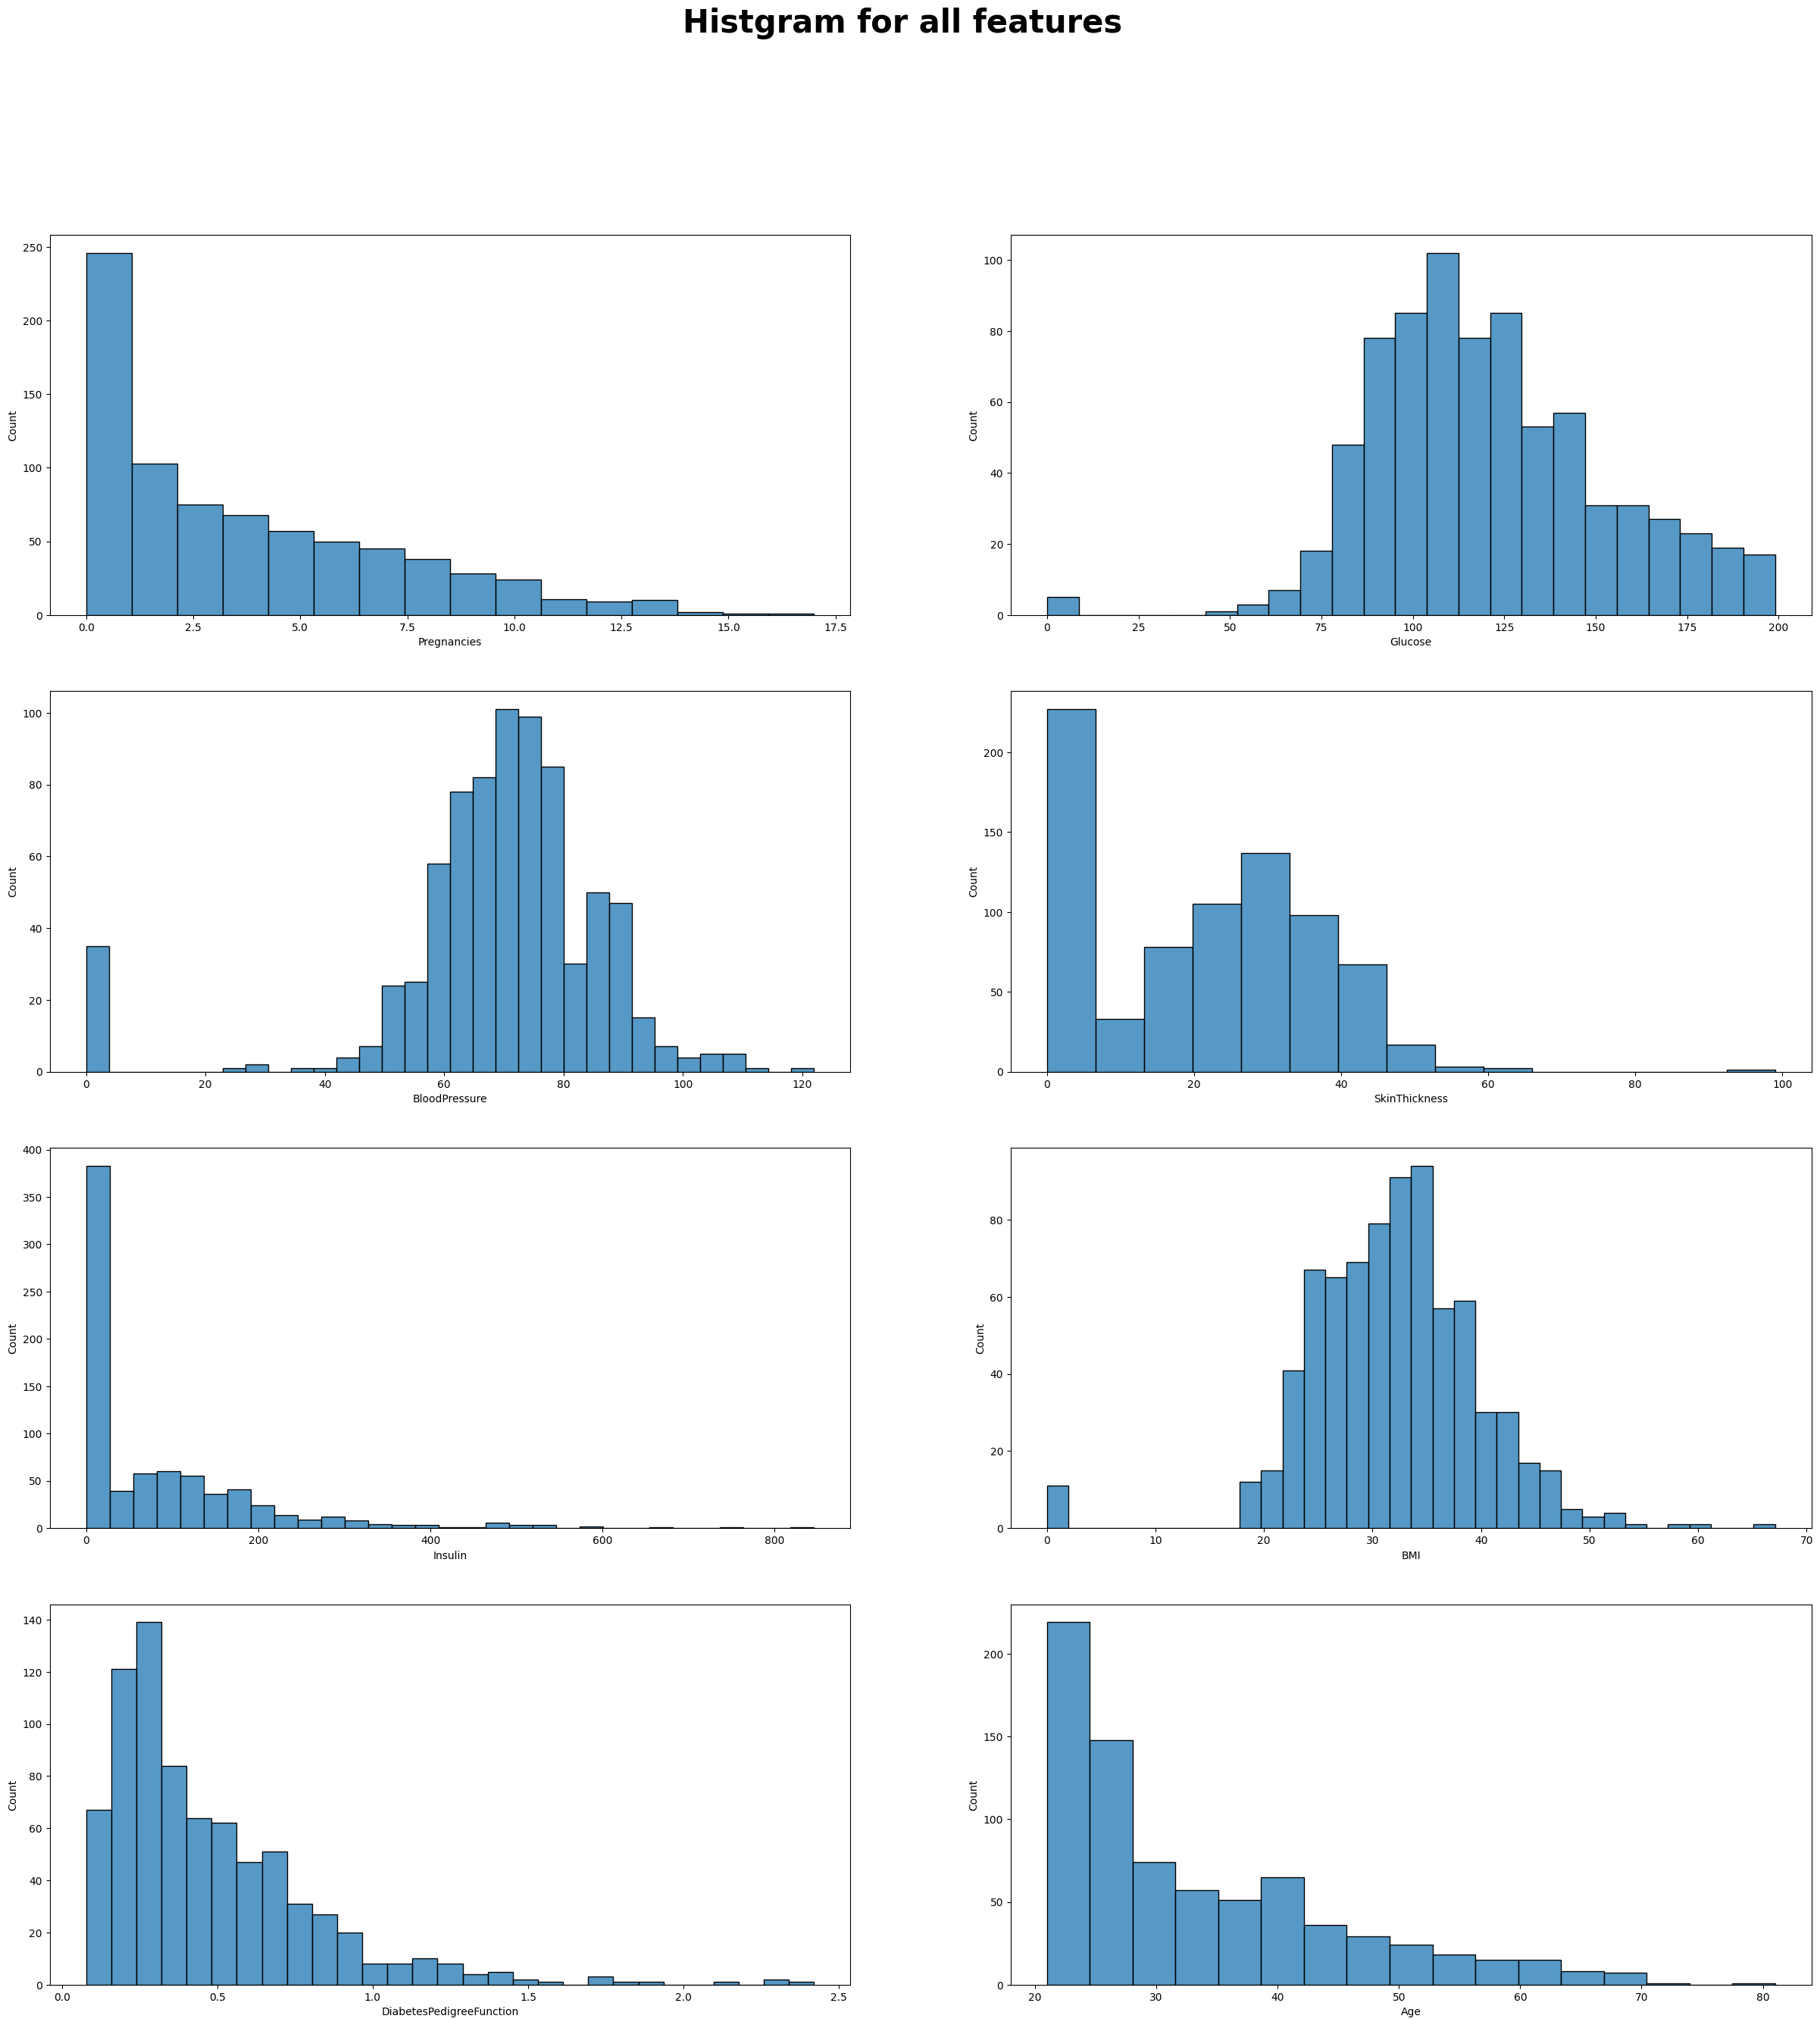

In [9]:
# Importing Matplotlib for plotting graphs
# Importing Seaborn for statistical data visualization
# Plotting histograms for all features in the diabetes dataset

import matplotlib.pyplot as plt
import seaborn as sns

Features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
counter = 0

plt.figure(figsize = (30, 30))
plt.suptitle("Histgram for all features",fontweight = "bold", fontsize = 30)
for feature in Features:
    counter = counter + 1
    plt.subplot(4,2,counter)
    sns.histplot(diabetes_data_set[feature])

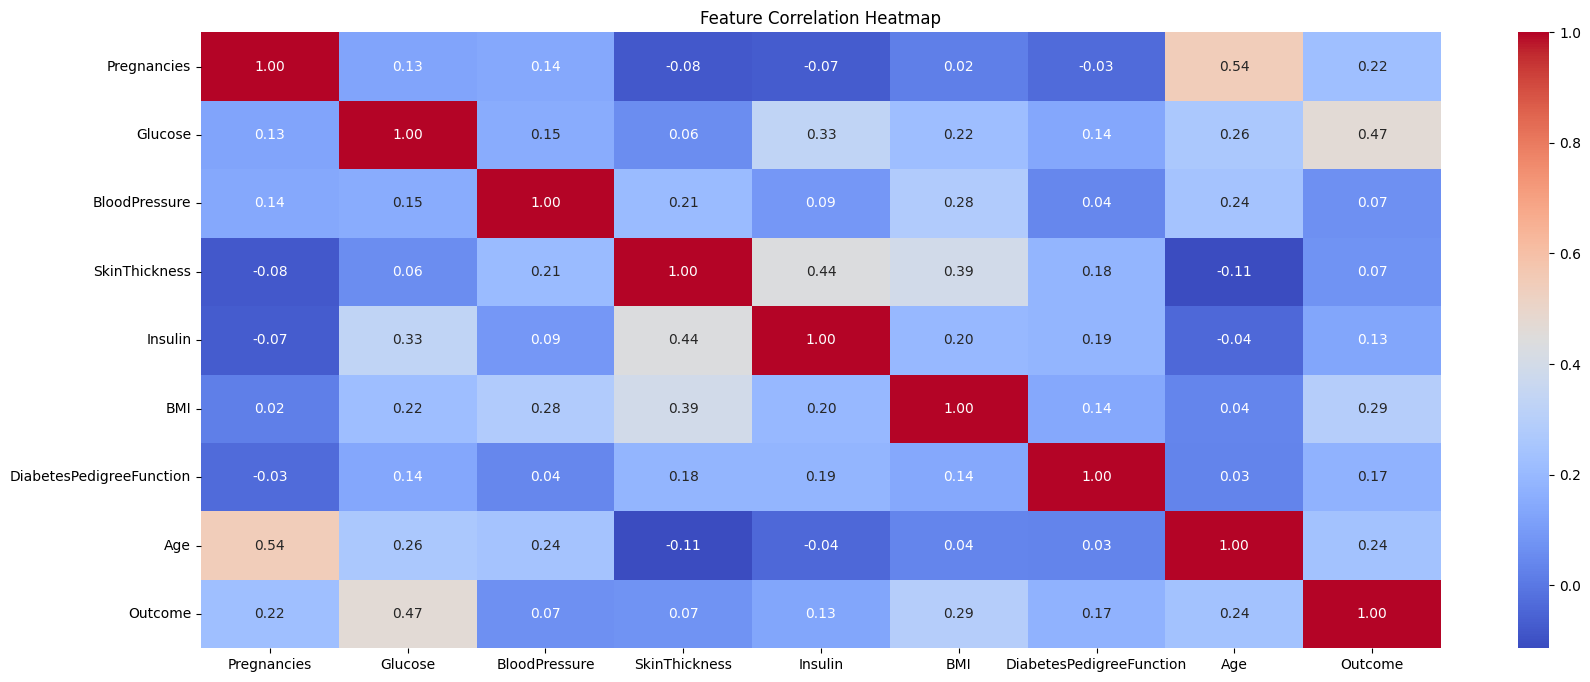

In [10]:
# Plotting the correlation heatmap

correlation_matrix = diabetes_data_set.select_dtypes(include=[float, int]).corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()

In [11]:
# Function to detect outliers

def detect_outliers(df, column_name):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for the data
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    no_of_outliers = sum((df[column_name] < lower_bound) | (df[column_name] > upper_bound))
    return no_of_outliers

In [12]:
# Function to remove outliers in a specified column

def remove_outliers_rows(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return df

In [13]:
# Function to cap outliers in a specified column

def cap_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column_name] = np.where(df[column_name] < lower_bound, lower_bound,
                               np.where(df[column_name] > upper_bound, upper_bound, df[column_name]))
    return df

In [14]:
# Return the number of outliers
Features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for feature in Features:
    print('Number of outliers in column {} is : {}'.format(feature, detect_outliers(diabetes_data_set, feature)))

Number of outliers in column Pregnancies is : 4
Number of outliers in column Glucose is : 5
Number of outliers in column BloodPressure is : 45
Number of outliers in column SkinThickness is : 1
Number of outliers in column Insulin is : 34
Number of outliers in column BMI is : 19
Number of outliers in column DiabetesPedigreeFunction is : 29
Number of outliers in column Age is : 9


In [15]:
# Remove outliers from specified features

remove_outlier_features = ['Pregnancies', 'Glucose', 'SkinThickness', 'Age']
for feature in remove_outlier_features:
    diabetes_data_set = remove_outliers_rows(diabetes_data_set, feature)

In [16]:
# Cap outliers in specified features

cap_outlier_features = ['BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']

for feature in cap_outlier_features:
    diabetes_data_set = cap_outliers(diabetes_data_set, feature)

In [17]:
# Preparing the data for modeling

X = diabetes_data_set.drop(columns = ['Outcome'], axis = 1)
Y = diabetes_data_set['Outcome']

In [18]:
# Importing train_test_split to split the data into training and testing sets
# Splitting the data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 42)

In [19]:
# Checking for skewness in the dataset

print(X_train.skew())

Pregnancies                 0.890217
Glucose                     0.584567
BloodPressure              -0.377481
SkinThickness              -0.029034
Insulin                     1.155719
BMI                         0.122371
DiabetesPedigreeFunction    1.054634
Age                         1.030701
dtype: float64


In [20]:
# Importing PowerTransformer to handle skewness
# Applying Power Transformation to reduce skewness

from sklearn.preprocessing import PowerTransformer
import pickle

pt = PowerTransformer(method='yeo-johnson')

X_train[['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']] = pt.fit_transform(X_train[['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']])

In [21]:
# Saving the trained PowerTransformer model to a file

pickle.dump(pt, open('Trained_models_Diabetes/Power_Transformer.pkl', 'wb'))

In [22]:
# Checking for skewness in the dataset again to see if it has been reduced

print(X_train.skew())

Pregnancies                 0.890217
Glucose                     0.584567
BloodPressure               0.023894
SkinThickness              -0.029034
Insulin                    -0.023002
BMI                         0.122371
DiabetesPedigreeFunction    0.136744
Age                         0.151065
dtype: float64


In [23]:
# Importing Variance Inflation Factor to check for multicollinearity
# Function to calculate Variance Inflation Factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    numeric_df = df.select_dtypes(include=[float, int])
    vif_data = pd.DataFrame()
    vif_data['feature'] = numeric_df.columns
    vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]
    return vif_data

vif_df = calculate_vif(X_train)
print(vif_df)

                    feature        VIF
0               Pregnancies   3.368192
1                   Glucose  14.281636
2             BloodPressure   1.138558
3             SkinThickness   4.983745
4                   Insulin   1.619952
5                       BMI  18.988279
6  DiabetesPedigreeFunction   1.069679
7                       Age   1.676267


In [24]:
# Importing PCA for dimensionality reduction
# Applying PCA to reduce dimensionality

from sklearn.decomposition import PCA

data_pca_1 = X_train[['Glucose', 'BMI']]
pca_1 = PCA(n_components = 1)
X_train['PC1'] = pca_1.fit_transform(data_pca_1)
X_train.drop(columns=['Glucose', 'BMI'], inplace=True)

In [25]:
# Saving the PCA model to a file

pickle.dump(pca_1, open('Trained_models_Diabetes/PCA.pkl', 'wb'))

In [26]:
# Check for class balance in the target variable

Y_train.value_counts(normalize=True)

Outcome
0    0.6543
1    0.3457
Name: proportion, dtype: float64

In [27]:
# Importing StandardScaler to standardize the features
# Data Standrization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [28]:
# Saving the trained StandardScaler model to a file

pickle.dump(scaler, open('Trained_models_Diabetes/Scaler.pkl', 'wb'))

In [29]:
# Fitting Testset with trained models 
X_test[['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']] = pt.transform(X_test[['BloodPressure', 'Insulin', 'DiabetesPedigreeFunction', 'Age']])
X_test_pca_input = X_test[['Glucose', 'BMI']]
X_test['PC1'] = pca_1.transform(X_test_pca_input)
X_test.drop(columns=['Glucose', 'BMI'], inplace=True)
X_test = scaler.transform(X_test)

In [30]:
# Importing cudf for GPU acceleration
# Makeing data suitable for GPU 

import cudf

X_train_gpu = cudf.DataFrame(X_train).astype('float32')
Y_train_gpu = cudf.Series(Y_train).astype('float32')
X_test_gpu = cudf.DataFrame(X_test).astype('float32')
Y_test_gpu = cudf.Series(Y_test).astype('float32')

In [31]:
# Importing F1 score for model evaluation
# Importing itertools for generating combinations
# Importing gc for garbage collection

from sklearn.metrics import f1_score
import itertools
import gc

In [32]:
# Importing KNeighborsRegressor from cuML for GPU-accelerated KNN regression
# Initializing the KNN Classifier 

from cuml.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [3, 5, 7, 11, 15, 21],        # Covering small to large neighborhood sizes
    'algorithm': ['brute'],                       # cuML currently only supports 'brute'
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],  # Available in cuML 25.x
    'weights': ['uniform'],          # Uniform weighting
}


best_score = 0
best_model = None
best_params = None

# Manual grid search
for n_neighbors, weights, metric in itertools.product(
        param_grid['n_neighbors'],
        param_grid['weights'],
        param_grid['metric']):
    
    model = KNeighborsClassifier(n_neighbors = n_neighbors, weights = weights, metric = metric, algorithm = 'brute')
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        best_score = score
        best_model = model
        best_params = {
            'n_neighbors': n_neighbors,
            'weights': weights,
            'metric': metric
        }
    else:
        del model
        gc.collect()
Best_KNN_model = best_model

In [33]:
# Importing accuracy_score roc_auc_score, log_loss for model evaluation
# Making predictions and calculating metrics for the best KNN model

from cuml.metrics import accuracy_score, roc_auc_score, log_loss

y_preds_KNN = Best_KNN_model.predict(X_test_gpu)
KNN_score = accuracy_score(Y_test_gpu, y_preds_KNN)
KNN_F1 = f1_score(Y_test, y_preds_KNN.to_numpy())
KNN_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_KNN)
KNN_log_loss = log_loss(Y_test_gpu, Best_KNN_model.predict_proba(X_test_gpu))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        97
           1       0.69      0.71      0.70        52

    accuracy                           0.79       149
   macro avg       0.76      0.77      0.77       149
weighted avg       0.79      0.79      0.79       149



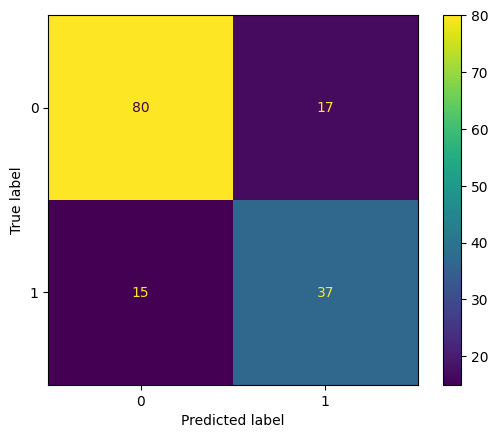

In [34]:
# Importing classification_report and confusion_matrix for evaluation
# Confusion matrix for KNN model

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

CR_KNN = classification_report(Y_test, y_preds_KNN.to_numpy())
print(CR_KNN)
CM_KNN = confusion_matrix(Y_test, y_preds_KNN.to_numpy())
CM_KNN = ConfusionMatrixDisplay(CM_KNN)
CM_KNN.plot()
plt.show()

In [35]:
# Importing LogisticRegression from cuML for GPU-accelerated logistic regression
# Initializing the Logistic Regression model with hyperparameters

from cuml.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],  # Regularization types
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],            # Inverse of regularization strength
    'max_iter': [100000],                   # Iterations for convergence
    'tol': [1e-4, 1e-3, 1e-2],                      # Convergence tolerance
    'fit_intercept': [True, False],                 # Whether to fit intercept
    'l1_ratio': [0.0, 0.5, 1.0],                    # Only used when penalty='elasticnet'
    'solver': ['qn']                         # solvers available in cuML 25.06.00
}


best_score = 0
best_model = None
best_params = None

# Manual grid search
for penalty, C, fit_intercept, max_iter, tol, solver in itertools.product(
        param_grid['penalty'],
        param_grid['C'],
        param_grid['fit_intercept'],
        param_grid['max_iter'],
        param_grid['tol'],
        param_grid['solver']):
    # Handle l1_ratio only when penalty == 'elasticnet'
    if penalty == 'elasticnet':
        for l1_ratio in param_grid['l1_ratio']:
            model = LogisticRegression(
                penalty=penalty,
                C=C,
                fit_intercept=fit_intercept,
                max_iter=max_iter,
                tol=tol,
                solver=solver,
                l1_ratio=l1_ratio
            )
            model.fit(X_train_gpu, Y_train_gpu)

            preds = model.predict(X_test_gpu).to_numpy()
            score = f1_score(Y_test, preds, average='weighted')

            if score > best_score:
                best_score = score
                best_model = model
                best_params = {
                    'penalty': penalty,
                    'C': C,
                    'fit_intercept': fit_intercept,
                    'max_iter': max_iter,
                    'tol': tol,
                    'solver': solver,
                    'l1_ratio': l1_ratio
                }
            else:
                del model
                gc.collect()
    else:
        model = LogisticRegression(
            penalty=penalty,
            C=C,
            fit_intercept=fit_intercept,
            max_iter=max_iter,
            tol=tol,
            solver=solver
            # No l1_ratio here
        )
        model.fit(X_train_gpu, Y_train_gpu)

        preds = model.predict(X_test_gpu).to_numpy()
        score = f1_score(Y_test, preds, average='weighted')

        if score > best_score:
            best_score = score
            best_model = model
            best_params = {
                'penalty': penalty,
                'C': C,
                'fit_intercept': fit_intercept,
                'max_iter': max_iter,
                'tol': tol,
                'solver': solver
            }
        else:
           del model
           gc.collect()
Best_Logistic_model = best_model

[2025-07-15 20:28:32.301] [CUML] [warning] QWL-QN stopped, because the line search failed to advance (step delta = 0.000000)


In [36]:
# Making predictions and calculating metrics for the best Logistic Regression model

y_preds_Logistic = Best_Logistic_model.predict(X_test_gpu)
Logistic_score = accuracy_score(Y_test_gpu, y_preds_Logistic)
Logistic_F1 = f1_score(Y_test, y_preds_Logistic.to_numpy())
Logistic_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_Logistic)
Logistic_log_loss = log_loss(Y_test_gpu, Best_Logistic_model.predict_proba(X_test_gpu))

              precision    recall  f1-score   support

           0       0.89      0.75      0.82        97
           1       0.64      0.83      0.72        52

    accuracy                           0.78       149
   macro avg       0.77      0.79      0.77       149
weighted avg       0.80      0.78      0.78       149



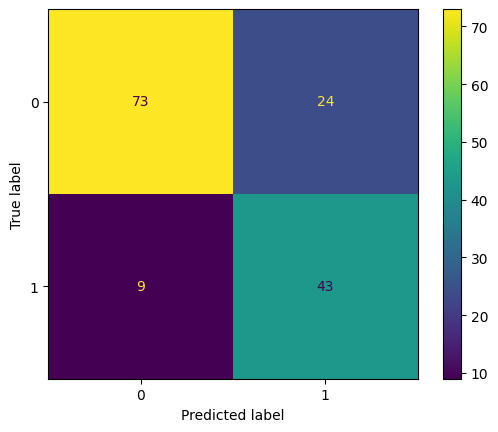

In [37]:
# Confusion matrix for Logistic model

CR_logistic = classification_report(Y_test, y_preds_Logistic.to_numpy())
print(CR_logistic)
CM_logistic = confusion_matrix(Y_test, y_preds_Logistic.to_numpy())
CM_logistic = ConfusionMatrixDisplay(CM_logistic)
CM_logistic.plot()
plt.show()

In [38]:
# Importing RandomForestClassifier from cuML for GPU-accelerated random forest classification
# Initializing the Random Forest Classifier with hyperparameters

from cuml.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 300, 500],
    'max_depth': [8, 16, 24],
    'max_features': [1.0, 0.8, 0.5],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [2, 4],
    'bootstrap': [True],
    'split_criterion': ['gini', 'entropy'],
    'max_leaves': [64],
    'max_samples': [0.9]
}


best_score = 0
best_model = None
best_params = None

# Manual grid searchS
for n_estimators, max_depth, max_features, min_samples_leaf, bootstrap, min_samples_split, split_criterion, max_leaves, max_samples in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['max_features'],
        param_grid['min_samples_leaf'],
        param_grid['bootstrap'],
        param_grid['min_samples_split'],
        param_grid['split_criterion'],
        param_grid['max_leaves'],
        param_grid['max_samples']):
    
    model = RandomForestClassifier(n_estimators = n_estimators, max_depth = max_depth, max_features = max_features, min_samples_leaf = min_samples_leaf, bootstrap = bootstrap,
        min_samples_split = min_samples_split, split_criterion = split_criterion, max_leaves = max_leaves, max_samples = max_samples, random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'max_features': max_features,
            'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap,
            'min_samples_split': min_samples_split,
            'split_criterion': split_criterion,
            'max_leaves': max_leaves,
            'max_samples': max_samples
        }
    else:
        del model
        gc.collect()
Best_RandomForest_model = best_model

In [39]:
# Making predictions and calculating metrics for the best RandomForest model

y_preds_RandomForest = Best_RandomForest_model.predict(X_test_gpu)
RandomForest_score = accuracy_score(Y_test_gpu, y_preds_RandomForest)
RandomForest_F1 = f1_score(Y_test, y_preds_RandomForest.to_numpy())
RandomForest_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_RandomForest)
RandomForest_log_loss = log_loss(Y_test_gpu, Best_RandomForest_model.predict_proba(X_test_gpu))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        97
           1       0.73      0.67      0.70        52

    accuracy                           0.80       149
   macro avg       0.78      0.77      0.77       149
weighted avg       0.80      0.80      0.80       149



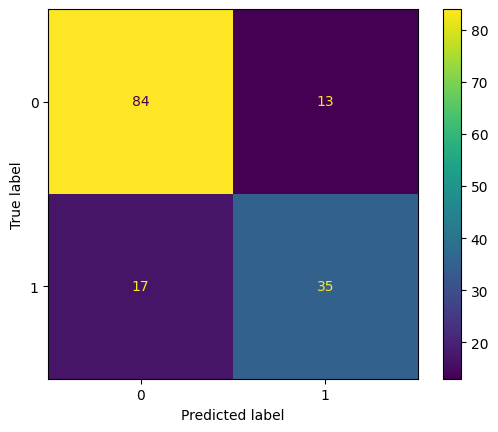

In [40]:
# Confusion matrix for RandomForest model

CR_RandomForest = classification_report(Y_test, y_preds_RandomForest.to_numpy())
print(CR_RandomForest)
CM_RandomForest = confusion_matrix(Y_test, y_preds_RandomForest.to_numpy())
CM_RandomForest = ConfusionMatrixDisplay(CM_RandomForest)
CM_RandomForest.plot()
plt.show()

In [41]:
# Importing SVC from cuML for GPU-accelerated support vector classification
# Initializing the SVC model with hyperparameters

from cuml.svm import SVC

param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0, 100.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
    'tol': [1e-3, 1e-4],
    'max_iter': [500, 1000],
    'probability': [True]
}

best_score = 0
best_model = None
best_params = None

for C, kernel, gamma, tol, max_iter, probability in itertools.product(
        param_grid['C'],
        param_grid['kernel'],
        param_grid['gamma'],
        param_grid['tol'],
        param_grid['max_iter'],
        param_grid['probability']):

    svc_params = {
        'C': C,
        'kernel': kernel,
        'gamma': gamma,
        'tol': tol,
        'max_iter': max_iter,
        'probability': probability
    }

    model = SVC(**svc_params)
    model.fit(X_train_gpu, Y_train_gpu)

    preds = model.predict(X_test_gpu).to_numpy()
    y_true = Y_test

    score = f1_score(y_true, preds, average='weighted')

    if score > best_score:
        best_score = score
        best_model = model
        best_params = svc_params
    else:
        del model
        gc.collect()
Best_SVM_model = best_model

[2025-07-15 20:33:04.584] [CUML] [warning] SVC with the linear kernel can be much faster using the specialized solver provided by LinearSVC. Consider switching to LinearSVC if tranining takes too long.


In [42]:
# Making predictions and calculating metrics for the best SVM model

y_preds_SVM = Best_SVM_model.predict(X_test_gpu)
SVM_score = accuracy_score(Y_test_gpu, y_preds_SVM)
SVM_F1 = f1_score(Y_test, y_preds_SVM.to_numpy())
SVM_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_SVM)
SVM_log_loss = log_loss(Y_test_gpu, Best_SVM_model.predict_proba(X_test_gpu))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86        97
           1       0.77      0.63      0.69        52

    accuracy                           0.81       149
   macro avg       0.79      0.77      0.78       149
weighted avg       0.80      0.81      0.80       149



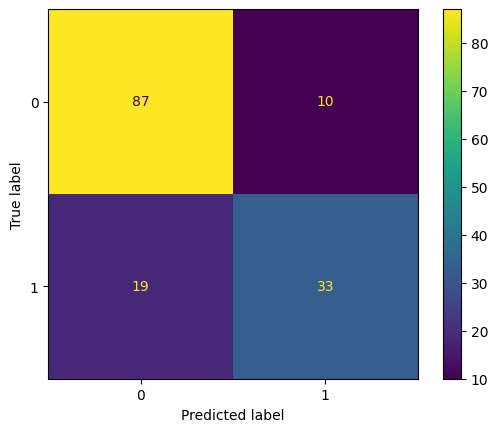

In [43]:
# Confusion matrix for SVM model

CR_SVM = classification_report(Y_test, y_preds_SVM.to_numpy())
print(CR_SVM)
CM_SVM = confusion_matrix(Y_test, y_preds_SVM.to_numpy())
CM_SVM = ConfusionMatrixDisplay(CM_SVM)
CM_SVM.plot()
plt.show()

In [44]:
# Importing XGBClassifier from XGBoost for GPU-accelerated gradient boosting classification
# Initializing the XGBClassifier with GPU support and hyperparameters

from xgboost import XGBClassifier

param_grid = {
    'n_estimators': [50, 100],  
    'max_depth': [3, 5],  
    'learning_rate': [0.01, 0.1],  
    'subsample': [0.8, 1.0],  
    'colsample_bytree': [0.8, 1.0],  
    'gamma': [0, 0.1],  
    'reg_alpha': [0, 0.1],  
    'reg_lambda': [1.0, 5.0],  
    'min_child_weight': [1, 3],  
}
best_score = 0
best_model = None
best_params = None

for n_estimators, max_depth, learning_rate, subsample, colsample_bytree, gamma, reg_alpha, reg_lambda, min_child_weight in itertools.product(
        param_grid['n_estimators'],
        param_grid['max_depth'],
        param_grid['learning_rate'],
        param_grid['subsample'],
        param_grid['colsample_bytree'],
        param_grid['gamma'],
        param_grid['reg_alpha'],
        param_grid['reg_lambda'],
        param_grid['min_child_weight']):
    
    model = XGBClassifier(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate, subsample = subsample, colsample_bytree = colsample_bytree,
        gamma = gamma, reg_alpha = reg_alpha, reg_lambda = reg_lambda, min_child_weight = min_child_weight,tree_method = 'hist', device = 'cuda', eval_metric = 'logloss', 
        random_state = 42)
    
    model.fit(X_train_gpu, Y_train_gpu)
    preds = model.predict(X_test_gpu)
    y_true = Y_test

    score = f1_score(y_true, preds, average = 'weighted')

    if score > best_score:
        if best_model is not None:
            del best_model
            gc.collect()
        best_score = score
        best_model = model
        best_params = {
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'learning_rate': learning_rate,
            'subsample': subsample,
            'colsample_bytree': colsample_bytree,
            'gamma': gamma,
            'reg_alpha': reg_alpha,
            'reg_lambda': reg_lambda,
            'min_child_weight': min_child_weight
        }
    else:
        del model
        gc.collect()

Best_XGB_model = best_model

In [45]:
# Making predictions and calculating metrics for the best XGB model

y_preds_XGB = Best_XGB_model.predict(X_test_gpu)
XGB_score = accuracy_score(Y_test_gpu, y_preds_XGB)
XGB_F1 = f1_score(Y_test, y_preds_XGB)
XGB_ROC_AUC = roc_auc_score(Y_test_gpu, y_preds_XGB)
XGB_log_loss = log_loss(Y_test_gpu, Best_XGB_model.predict_proba(X_test_gpu))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85        97
           1       0.74      0.67      0.71        52

    accuracy                           0.81       149
   macro avg       0.79      0.77      0.78       149
weighted avg       0.80      0.81      0.80       149



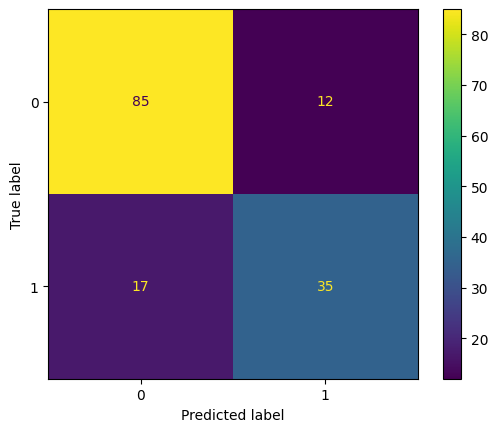

In [46]:
# Confusion matrix for XGB model

CR_XGB = classification_report(Y_test, y_preds_XGB)
print(CR_XGB)
CM_XGB = confusion_matrix(Y_test, y_preds_XGB)
CM_XGB = ConfusionMatrixDisplay(CM_XGB)
CM_XGB.plot()
plt.show()

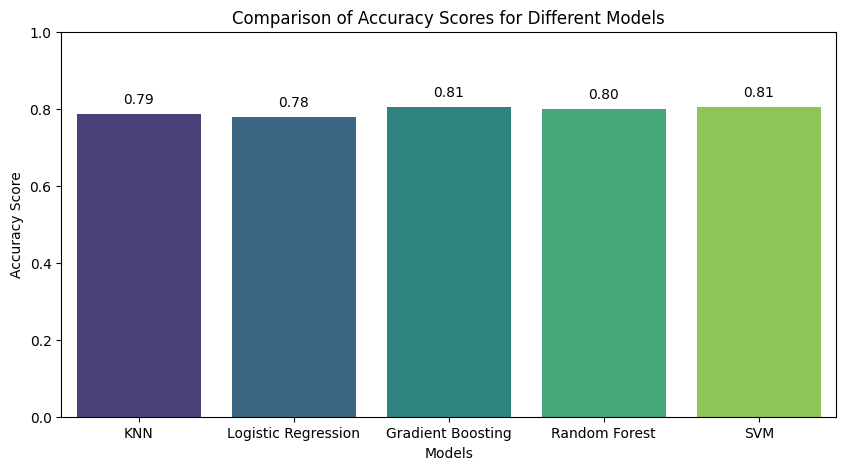

In [47]:
# Comparison of Accuracy Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
scores = [KNN_score, Logistic_score, XGB_score, RandomForest_score, SVM_score]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Accuracy Scores for Different Models')
plt.ylim(0, 1) 


for i, score in enumerate(scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

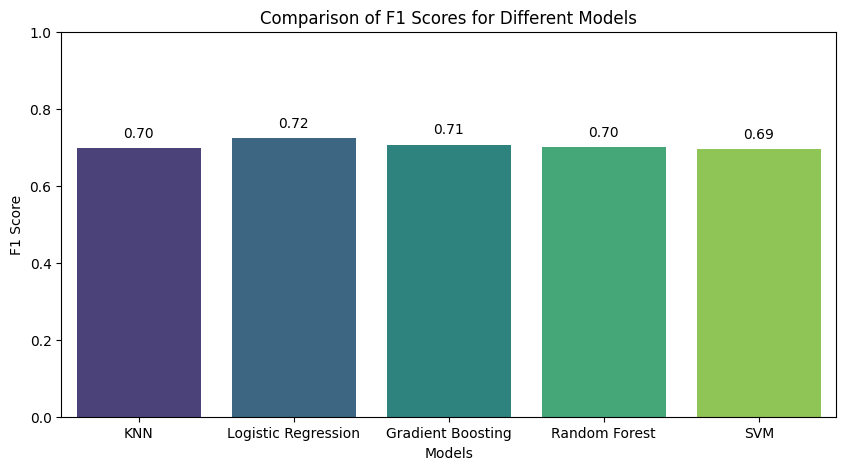

In [48]:
# Comparison of F1 Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
F1_scores = [KNN_F1, Logistic_F1, XGB_F1, RandomForest_F1, SVM_F1]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = F1_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('Comparison of F1 Scores for Different Models')
plt.ylim(0, 1) 


for i, score in enumerate(F1_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

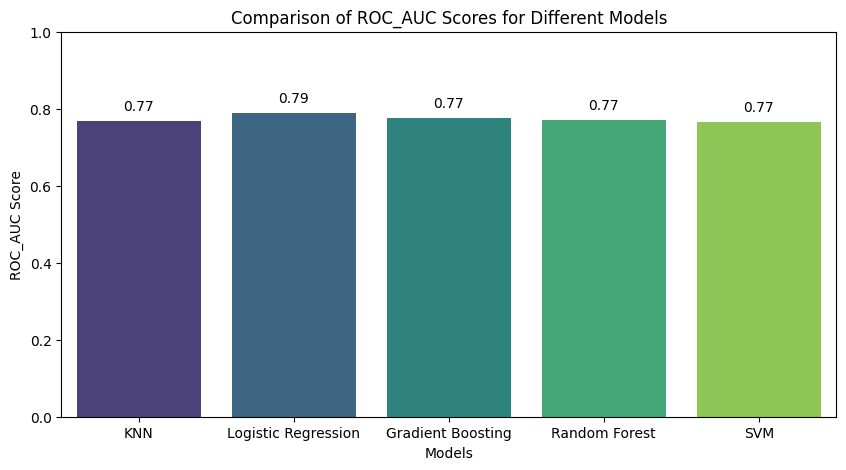

In [49]:
# Comparison of ROC_AUC Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
ROUC_AUC_scores = [KNN_ROC_AUC, Logistic_ROC_AUC, XGB_ROC_AUC, RandomForest_ROC_AUC, SVM_ROC_AUC]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = ROUC_AUC_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('ROC_AUC Score')
plt.title('Comparison of ROC_AUC Scores for Different Models')
plt.ylim(0, 1) 


for i, score in enumerate(ROUC_AUC_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

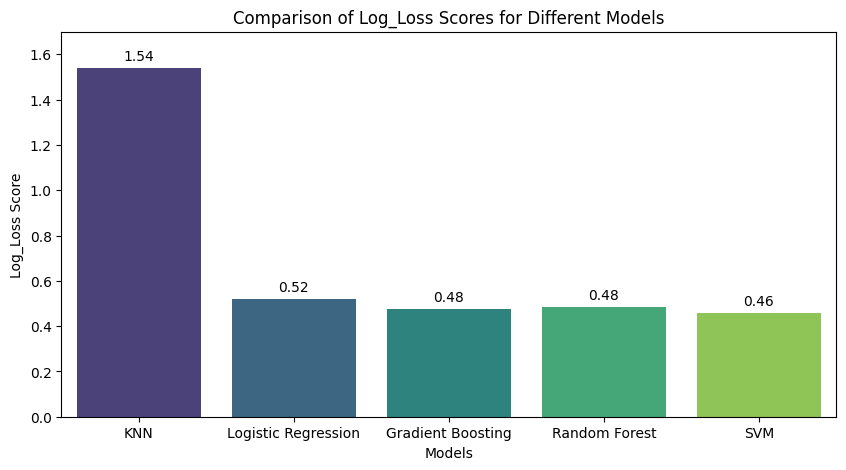

In [52]:
# Comparison of Log_Loss Scores for Different Models

models = ['KNN','Logistic Regression', 'Gradient Boosting', 'Random Forest', 'SVM']
Log_Loss_scores = [KNN_log_loss, Logistic_log_loss, XGB_log_loss, RandomForest_log_loss, SVM_log_loss]  

plt.figure(figsize=(10, 5))
sns.barplot(x = models, y = Log_Loss_scores, hue = models, legend = False, palette = 'viridis')

plt.xlabel('Models')
plt.ylabel('Log_Loss Score')
plt.title('Comparison of Log_Loss Scores for Different Models')
plt.ylim(0, 1.7) 


for i, score in enumerate(Log_Loss_scores):
    plt.text(i, score + 0.02, f'{score:.2f}', ha = 'center', va = 'bottom')


plt.show()

In [51]:
# Saving the best models to files

pickle.dump(Best_XGB_model, open('Trained_models_Diabetes/Diabetes.pkl', 'wb'))